In [1]:
import numpy as np
import sys
if "../" not in sys.path:
    sys.path.append("../")
from collections import defaultdict
from lib import plotting
import matplotlib
from lib.envs.windy_gridworld import WindyGridworldEnv

import itertools
matplotlib.style.use('ggplot')


In [3]:
env = WindyGridworldEnv()

In [12]:
def makeEpsilonGreedyPolicy(Q1, Q2, epsilon):
    def policy(state):
        A = epsilon * np.ones(len(Q1[state]), dtype=float)/len(Q1[state])
        best_action = np.argmax(Q1[state]+Q2[state])
        A[best_action] += 1 - epsilon
        return A
    return policy

In [19]:
def doubleQLearning(env, num_episodes, discount=1.00, epsilon=0.1):
    Q1 = defaultdict(lambda: np.zeros(env.action_space.n))
    Q2 = defaultdict(lambda: np.zeros(env.action_space.n))
    policy = makeEpsilonGreedyPolicy(Q1, Q2, epsilon)
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))
    
    for episode in range(num_episodes):
        state = env.reset()
        for t in itertools.count():
            action = np.random.choice(np.arange(len(Q1[state])), p=policy(state))
            next_state, reward, done, _ = env.step(action)
            Q_choice = np.random.choice([0,1], p=[0.5, 0.5])
            if Q_choice == 0:
                target = reward + discount*Q2[next_state][np.argmax(Q1[next_state])]
                Q1[state][action] += 0.5*(target - Q1[state][action])
            else:
                target = reward + discount*Q1[next_state][np.argmax(Q2[next_state])]
                Q2[state][action] += 0.5*(target - Q2[state][action])
            stats.episode_rewards[episode] += reward
            stats.episode_lengths[episode] = t
            if done:
                break
            state = next_state
    
    return Q1, Q2, stats

In [20]:
Q1, Q2, stats = doubleQLearning(env, num_episodes=20, epsilon=0.1)

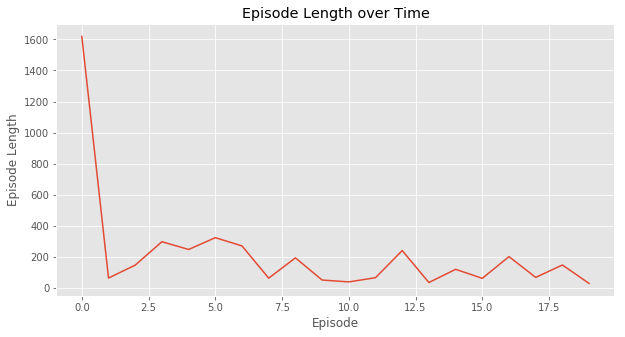

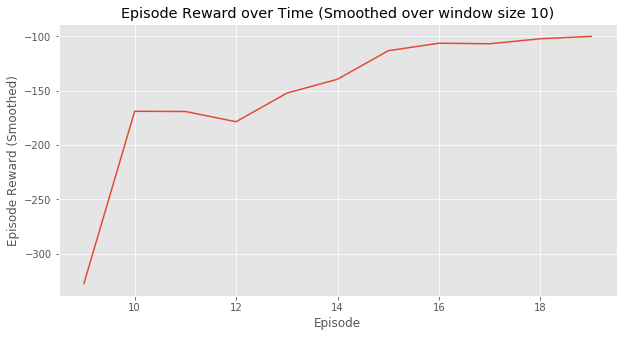

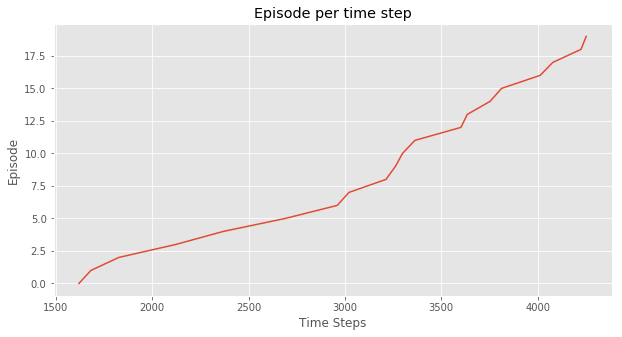

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [21]:
plotting.plot_episode_stats(stats)

In [ ]:
# Notice better rewards compared to On policy Sarsa by the 18th episode.